# Model Evaluation and Selection  
**Author:** [Joem Mathews]  
**Date:** [10-03-2025]  
**Description:**  
This project evaluates four machine learning models (Logistic Regression, Random Forest,  
Decision Tree, and KNN) to determine the best-performing model based on accuracy.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('Crime_Incidents_in_2024.csv')
df.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,396384.27,137427.7600,24054605,2024/04/12 14:24:15+00,DAY,OTHERS,THEFT F/AUTO,1100 - 1199 BLOCK OF 18TH STREET NW,396384.270000,137427.760000,...,010700 1,10700.0,Precinct 17,38.904699,-77.041686,GOLDEN TRIANGLE,2024/04/12 06:33:00+00,2024/04/12 08:59:00+00,666213423,NaN
1,395709.91,137490.9400,24056000,2024/04/14 23:56:40+00,EVENING,OTHERS,THEFT/OTHER,2200 - 2299 BLOCK OF M STREET NW,395709.910000,137490.940000,...,005501 2,5501.0,Precinct 4,38.905265,-77.049461,NaN,2024/04/14 04:00:00+00,NaN,666213424,NaN
2,397497.55,137053.1300,24056385,2024/04/15 17:42:57+00,DAY,OTHERS,THEFT/OTHER,1200 - 1299 BLOCK OF I STREET NW,397497.550000,137053.130000,...,010100 2,10100.0,Precinct 129,38.901328,-77.028849,DOWNTOWN,2024/04/15 14:31:00+00,2024/04/15 15:18:00+00,666213769,NaN
3,400040.61,129046.4721,18060158,2024/07/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,400 - 599 BLOCK OF CHESAPEAKE STREET SE,400040.610046,129046.472149,...,009802 2,9802.0,Precinct 125,38.829204,-76.999532,NaN,2018/04/15 16:07:00+00,2018/04/15 17:34:56+00,666236835,NaN
4,397171.11,137408.2500,24013789,2024/01/28 07:33:28+00,MIDNIGHT,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF VERMONT AVENUE NW,397171.110000,137408.250000,...,010100 3,10100.0,Precinct 17,38.904526,-77.032614,DOWNTOWN,2024/01/28 06:41:00+00,2024/01/28 07:12:00+00,666239683,NaN


In [3]:
df.columns

Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK',
       'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'OCTO_RECORD_ID'],
      dtype='object')

In [4]:
df

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,396384.2700,137427.7600,24054605,2024/04/12 14:24:15+00,DAY,OTHERS,THEFT F/AUTO,1100 - 1199 BLOCK OF 18TH STREET NW,396384.270000,137427.760000,...,010700 1,10700.0,Precinct 17,38.904699,-77.041686,GOLDEN TRIANGLE,2024/04/12 06:33:00+00,2024/04/12 08:59:00+00,666213423,NaN
1,395709.9100,137490.9400,24056000,2024/04/14 23:56:40+00,EVENING,OTHERS,THEFT/OTHER,2200 - 2299 BLOCK OF M STREET NW,395709.910000,137490.940000,...,005501 2,5501.0,Precinct 4,38.905265,-77.049461,NaN,2024/04/14 04:00:00+00,NaN,666213424,NaN
2,397497.5500,137053.1300,24056385,2024/04/15 17:42:57+00,DAY,OTHERS,THEFT/OTHER,1200 - 1299 BLOCK OF I STREET NW,397497.550000,137053.130000,...,010100 2,10100.0,Precinct 129,38.901328,-77.028849,DOWNTOWN,2024/04/15 14:31:00+00,2024/04/15 15:18:00+00,666213769,NaN
3,400040.6100,129046.4721,18060158,2024/07/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,400 - 599 BLOCK OF CHESAPEAKE STREET SE,400040.610046,129046.472149,...,009802 2,9802.0,Precinct 125,38.829204,-76.999532,NaN,2018/04/15 16:07:00+00,2018/04/15 17:34:56+00,666236835,NaN
4,397171.1100,137408.2500,24013789,2024/01/28 07:33:28+00,MIDNIGHT,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF VERMONT AVENUE NW,397171.110000,137408.250000,...,010100 3,10100.0,Precinct 17,38.904526,-77.032614,DOWNTOWN,2024/01/28 06:41:00+00,2024/01/28 07:12:00+00,666239683,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29290,400089.0400,137531.6300,24042076,2024/03/20 09:00:31+00,MIDNIGHT,GUN,ASSAULT W/DANGEROUS WEAPON,500 - 599 BLOCK OF M STREET NE,400089.040000,137531.630000,...,010602 4,10602.0,Precinct 83,38.905642,-76.998973,NaN,2024/03/20 07:35:00+00,2024/03/20 09:00:00+00,666776307,NaN
29291,397228.7400,137931.7900,24030573,2024/02/28 03:35:06+00,EVENING,OTHERS,THEFT F/AUTO,1400 - 1499 BLOCK OF 14TH STREET NW,397228.740000,137931.790000,...,005003 1,5003.0,Precinct 16,38.909243,-77.031952,NaN,2024/02/28 02:20:00+00,NaN,666776316,NaN
29292,403784.4300,135262.0600,24033166,2024/03/04 07:39:52+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,3400 - 3513 BLOCK OF MINNESOTA AVENUE SE,403784.430000,135262.060000,...,007703 4,7703.0,Precinct 107,38.885189,-76.956381,NaN,2024/03/04 02:07:00+00,2024/03/04 04:15:00+00,666776317,NaN
29293,396307.9600,137321.6500,24033419,2024/03/04 17:51:22+00,DAY,OTHERS,THEFT/OTHER,1800 - 1899 BLOCK OF L STREET NW,396307.960000,137321.650000,...,010700 1,10700.0,Precinct 17,38.903743,-77.042565,GOLDEN TRIANGLE,2024/03/04 16:31:00+00,2024/03/04 16:35:00+00,666776318,NaN


In [5]:
df.tail()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
29290,400089.0400,137531.6300,24042076,2024/03/20 09:00:31+00,MIDNIGHT,GUN,ASSAULT W/DANGEROUS WEAPON,500 - 599 BLOCK OF M STREET NE,400089.04000,137531.630000,...,010602 4,10602.0,Precinct 83,38.905642,-76.998973,NaN,2024/03/20 07:35:00+00,2024/03/20 09:00:00+00,666776307,NaN
29291,397228.7400,137931.7900,24030573,2024/02/28 03:35:06+00,EVENING,OTHERS,THEFT F/AUTO,1400 - 1499 BLOCK OF 14TH STREET NW,397228.74000,137931.790000,...,005003 1,5003.0,Precinct 16,38.909243,-77.031952,NaN,2024/02/28 02:20:00+00,NaN,666776316,NaN
29292,403784.4300,135262.0600,24033166,2024/03/04 07:39:52+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,3400 - 3513 BLOCK OF MINNESOTA AVENUE SE,403784.43000,135262.060000,...,007703 4,7703.0,Precinct 107,38.885189,-76.956381,NaN,2024/03/04 02:07:00+00,2024/03/04 04:15:00+00,666776317,NaN
29293,396307.9600,137321.6500,24033419,2024/03/04 17:51:22+00,DAY,OTHERS,THEFT/OTHER,1800 - 1899 BLOCK OF L STREET NW,396307.96000,137321.650000,...,010700 1,10700.0,Precinct 17,38.903743,-77.042565,GOLDEN TRIANGLE,2024/03/04 16:31:00+00,2024/03/04 16:35:00+00,666776318,NaN
29294,404893.2619,135894.6645,24033564,2024/03/04 23:35:26+00,EVENING,OTHERS,MOTOR VEHICLE THEFT,4100 - 4199 BLOCK OF AMES STREET NE,404893.26189,135894.664508,...,009603 1,9603.0,Precinct 102,38.890882,-76.943597,NaN,2024/03/04 20:52:00+00,2024/03/04 21:54:00+00,666776319,NaN


In [6]:
df.sample()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
22604,399819.8468,128990.9394,24111055,2024/07/20 12:20:22+00,DAY,KNIFE,ASSAULT W/DANGEROUS WEAPON,4000 - 4399 BLOCK OF 3RD STREET SE,399819.846846,128990.939381,...,009810 1,9810.0,Precinct 125,38.828704,-77.002075,NaN,2024/07/20 09:44:00+00,2024/07/27 12:00:00+00,666739377,NaN


In [7]:
df.shape

(29295, 25)

In [8]:
df.describe()

,X,Y,CCN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,CENSUS_TRACT,LATITUDE,LONGITUDE,OBJECTID,OCTO_RECORD_ID
count,29295.000000,29295.000000,2.929500e+04,29295.000000,29295.000000,29291.000000,28550.000000,28827.000000,29280.000000,29295.000000,29295.000000,2.929500e+04,0.0
mean,399281.365189,137801.454601,2.412673e+07,399281.365190,137801.454601,4.393602,3.703292,374.842994,7521.588081,38.908067,-77.008292,6.666143e+08,NaN
std,3032.291061,3344.181869,1.624752e+05,3032.291061,3344.181868,2.322873,1.841980,183.751097,34736.612847,0.030124,0.034962,1.575541e+05,NaN
min,390362.150000,127300.240000,5.094764e+06,390362.150000,127300.240000,1.000000,1.000000,101.000000,101.000000,38.813473,-77.111162,6.662134e+08,NaN
25%,397229.000000,136234.280000,2.405873e+07,397229.000006,136234.280000,2.000000,2.000000,207.000000,3500.000000,38.893930,-77.031952,6.665412e+08,NaN
50%,399029.030000,137856.980000,2.411504e+07,399029.030000,137856.979997,5.000000,4.000000,401.000000,7202.000000,38.908569,-77.011192,6.666663e+08,NaN
75%,401206.777300,139815.115000,2.416641e+07,401206.777279,139815.115000,6.000000,5.000000,506.000000,9102.000000,38.926188,-76.986094,6.667370e+08,NaN
max,407806.750900,147365.030000,2.503097e+07,407806.750917,147365.030000,8.000000,7.000000,708.000000,980000.000000,38.994217,-76.910012,6.667763e+08,NaN


In [9]:
df.isna().sum()

X                           0
Y                           0
CCN                         0
REPORT_DAT                  0
SHIFT                       0
METHOD                      0
OFFENSE                     0
BLOCK                       0
XBLOCK                      0
YBLOCK                      0
WARD                        4
ANC                         4
DISTRICT                  745
PSA                       468
NEIGHBORHOOD_CLUSTER        4
BLOCK_GROUP                15
CENSUS_TRACT               15
VOTING_PRECINCT             4
LATITUDE                    0
LONGITUDE                   0
BID                     23881
START_DATE                  6
END_DATE                 2095
OBJECTID                    0
OCTO_RECORD_ID          29295
dtype: int64

In [10]:
df.ndim

2

## Data Cleaning

**Missing Values**

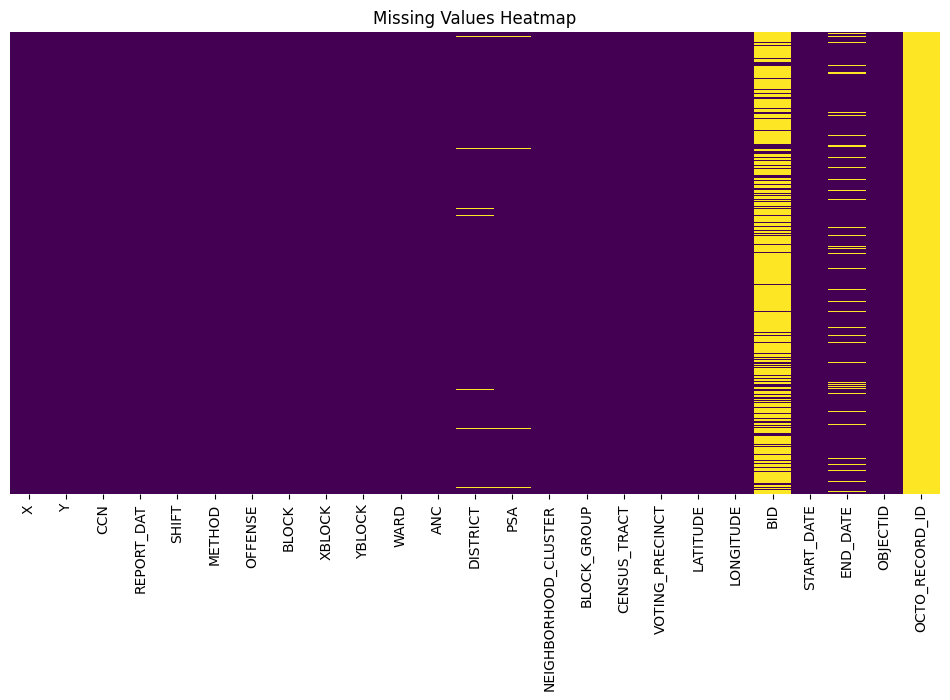

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

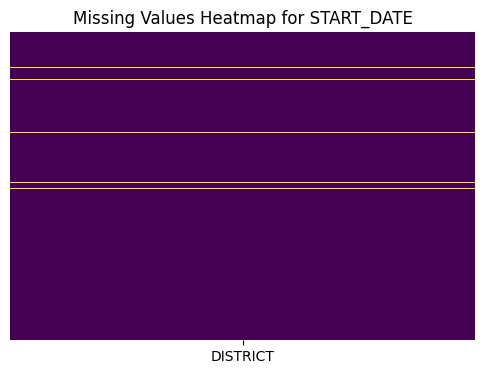

In [12]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['DISTRICT']].isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap for START_DATE")
plt.show()

In [13]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 WARD                        4
ANC                         4
DISTRICT                  745
PSA                       468
NEIGHBORHOOD_CLUSTER        4
BLOCK_GROUP                15
CENSUS_TRACT               15
VOTING_PRECINCT             4
BID                     23881
START_DATE                  6
END_DATE                 2095
OCTO_RECORD_ID          29295
dtype: int64


In [14]:
df = df.drop(columns=["OCTO_RECORD_ID", "BID","END_DATE","START_DATE",
             "BLOCK_GROUP","CENSUS_TRACT","VOTING_PRECINCT","BLOCK","ANC"])

In [15]:
df["WARD"].fillna(df["WARD"].median(), inplace=True)
df["DISTRICT"].fillna(df["DISTRICT"].mode()[0], inplace=True)
df["PSA"].fillna(df["PSA"].median(), inplace=True)
df["NEIGHBORHOOD_CLUSTER"].fillna(df["NEIGHBORHOOD_CLUSTER"].mode()[0], inplace=True)

C:\Users\Joem Mathews\AppData\Local\Temp\ipykernel_6740\4287515234.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["WARD"].fillna(df["WARD"].median(), inplace=True)
C:\Users\Joem Mathews\AppData\Local\Temp\ipykernel_6740\4287515234.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [16]:
df.isna().sum()

X                       0
Y                       0
CCN                     0
REPORT_DAT              0
SHIFT                   0
METHOD                  0
OFFENSE                 0
XBLOCK                  0
YBLOCK                  0
WARD                    0
DISTRICT                0
PSA                     0
NEIGHBORHOOD_CLUSTER    0
LATITUDE                0
LONGITUDE               0
OBJECTID                0
dtype: int64

**Duplicates**

In [17]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


**Formatting Data**

In [18]:
df["REPORT_DAT"] = pd.to_datetime(df["REPORT_DAT"], errors='coerce')

In [19]:
df.columns = df.columns.str.lower()

In [20]:
df["offense"] = df["offense"].str.strip()
df["method"] = df["method"].str.strip()
df["shift"] = df["shift"].str.strip()

In [21]:
df["offense"] = df["offense"].str.upper()
df["method"] = df["method"].str.upper()
df["shift"] = df["shift"].str.upper()

In [22]:
df.head()

,x,y,ccn,report_dat,shift,method,offense,xblock,yblock,ward,district,psa,neighborhood_cluster,latitude,longitude,objectid
0,396384.27,137427.7600,24054605,2024-04-12 14:24:15+00:00,DAY,OTHERS,THEFT F/AUTO,396384.270000,137427.760000,2.0,2.0,207.0,Cluster 6,38.904699,-77.041686,666213423
1,395709.91,137490.9400,24056000,2024-04-14 23:56:40+00:00,EVENING,OTHERS,THEFT/OTHER,395709.910000,137490.940000,2.0,2.0,207.0,Cluster 5,38.905265,-77.049461,666213424
2,397497.55,137053.1300,24056385,2024-04-15 17:42:57+00:00,DAY,OTHERS,THEFT/OTHER,397497.550000,137053.130000,2.0,2.0,209.0,Cluster 8,38.901328,-77.028849,666213769
3,400040.61,129046.4721,18060158,2024-07-30 04:00:00+00:00,MIDNIGHT,GUN,HOMICIDE,400040.610046,129046.472149,8.0,7.0,706.0,Cluster 39,38.829204,-76.999532,666236835
4,397171.11,137408.2500,24013789,2024-01-28 07:33:28+00:00,MIDNIGHT,OTHERS,THEFT/OTHER,397171.110000,137408.250000,2.0,2.0,207.0,Cluster 8,38.904526,-77.032614,666239683


**Data Types**

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29295 entries, 0 to 29294
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   x                     29295 non-null  float64            
 1   y                     29295 non-null  float64            
 2   ccn                   29295 non-null  int64              
 3   report_dat            29295 non-null  datetime64[ns, UTC]
 4   shift                 29295 non-null  object             
 5   method                29295 non-null  object             
 6   offense               29295 non-null  object             
 7   xblock                29295 non-null  float64            
 8   yblock                29295 non-null  float64            
 9   ward                  29295 non-null  float64            
 10  district              29295 non-null  float64            
 11  psa                   29295 non-null  float64            
 12  neig

In [24]:
print("Unique Offenses:", df["offense"].unique())
print("Unique Methods:", df["method"].unique())
print("Unique Shifts:", df["shift"].unique())
print("Unique Neighborhood_Cluster:", df["neighborhood_cluster"].unique())

Unique Offenses: ['THEFT F/AUTO' 'THEFT/OTHER' 'HOMICIDE' 'MOTOR VEHICLE THEFT' 'ROBBERY'
 'ASSAULT W/DANGEROUS WEAPON' 'ARSON' 'BURGLARY' 'SEX ABUSE']
Unique Methods: ['OTHERS' 'GUN' 'KNIFE']
Unique Shifts: ['DAY' 'EVENING' 'MIDNIGHT']
Unique Neighborhood_Cluster: ['Cluster 6' 'Cluster 5' 'Cluster 8' 'Cluster 39' 'Cluster 22'
 'Cluster 11' 'Cluster 2' 'Cluster 16' 'Cluster 25' 'Cluster 34'
 'Cluster 4' 'Cluster 35' 'Cluster 9' 'Cluster 26' 'Cluster 21'
 'Cluster 3' 'Cluster 27' 'Cluster 32' 'Cluster 17' 'Cluster 23'
 'Cluster 33' 'Cluster 31' 'Cluster 1' 'Cluster 12' 'Cluster 18'
 'Cluster 10' 'Cluster 7' 'Cluster 14' 'Cluster 20' 'Cluster 15'
 'Cluster 19' 'Cluster 24' 'Cluster 40' 'Cluster 36' 'Cluster 30'
 'Cluster 28' 'Cluster 13' 'Cluster 43' 'Cluster 38' 'Cluster 45'
 'Cluster 37' 'Cluster 29' 'Cluster 44' 'Cluster 46' 'Cluster 41']


In [25]:
label_encoder = LabelEncoder()
df["shift_new"] = label_encoder.fit_transform(df["shift"])

In [26]:
df['cluster'] = df['neighborhood_cluster'].str.extract('(\d+)')
df['cluster'] = pd.to_numeric(df['cluster'], errors='coerce')

In [27]:
label_encoder = LabelEncoder()
df["offense_new"] = label_encoder.fit_transform(df["offense"])

In [28]:
df['reported_date'] = df['report_dat'].dt.date
df["reported_date"] = pd.to_datetime(df["reported_date"], errors='coerce')
df['month'] = df['reported_date'].dt.month

In [29]:
label_encoder = LabelEncoder()
df["method_new"] = label_encoder.fit_transform(df["method"])

In [30]:
df = df.drop(columns=["longitude", "latitude","x","y","objectid","shift","neighborhood_cluster","offense","report_dat",
                     "reported_date"])

In [31]:
df = df.drop(columns=["method"])

In [32]:
df.head()

,ccn,xblock,yblock,ward,district,psa,shift_new,cluster,offense_new,month,method_new
0,24054605,396384.270000,137427.760000,2.0,2.0,207.0,0,6,7,4,2
1,24056000,395709.910000,137490.940000,2.0,2.0,207.0,1,5,8,4,2
2,24056385,397497.550000,137053.130000,2.0,2.0,209.0,0,8,8,4,2
3,18060158,400040.610046,129046.472149,8.0,7.0,706.0,2,39,3,7,0
4,24013789,397171.110000,137408.250000,2.0,2.0,207.0,2,8,8,1,2


In [33]:
df.columns = ['CNN', 'XBLOCK','YBLOCK','WARD','DISTRICT',
              'PSA','SHIFT','CLUSTER','OFFENSE','MONTH','METHOD']

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29295 entries, 0 to 29294
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CNN       29295 non-null  int64  
 1   XBLOCK    29295 non-null  float64
 2   YBLOCK    29295 non-null  float64
 3   WARD      29295 non-null  float64
 4   DISTRICT  29295 non-null  float64
 5   PSA       29295 non-null  float64
 6   SHIFT     29295 non-null  int64  
 7   CLUSTER   29295 non-null  int64  
 8   OFFENSE   29295 non-null  int64  
 9   MONTH     29295 non-null  int32  
 10  METHOD    29295 non-null  int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 2.3 MB


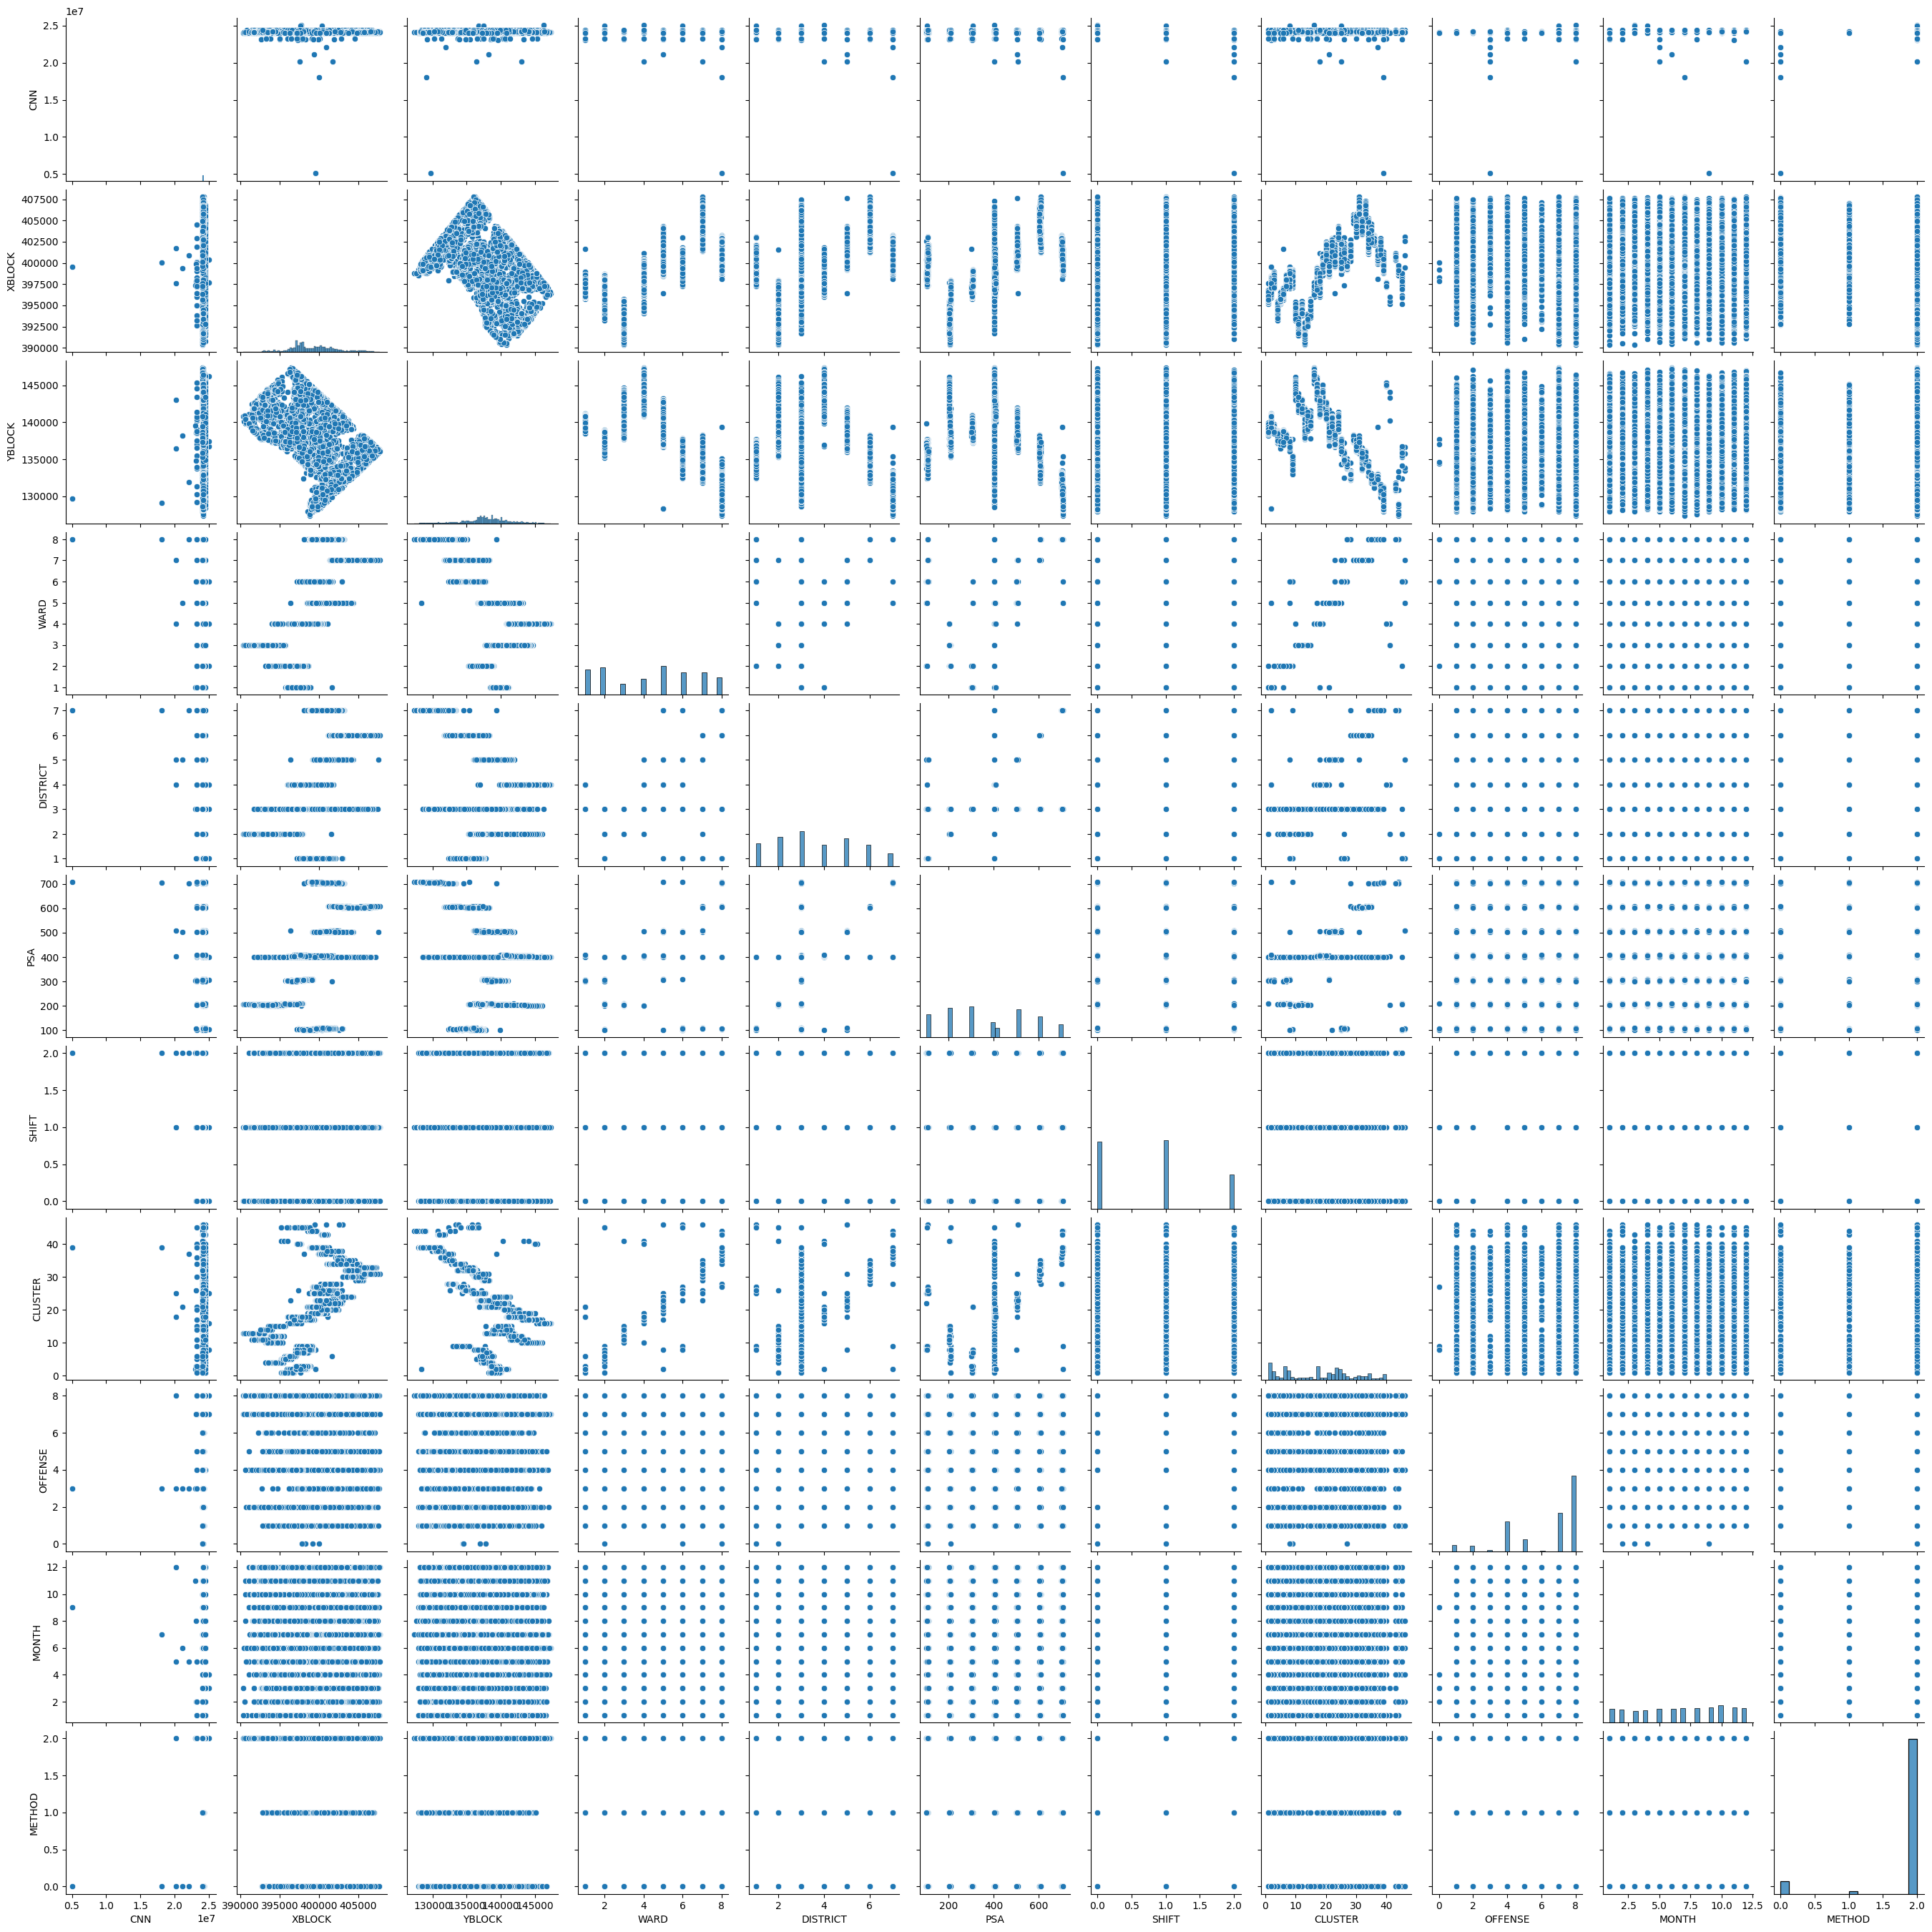

In [35]:
sns.pairplot(df)

<Axes: xlabel='METHOD', ylabel='count'>

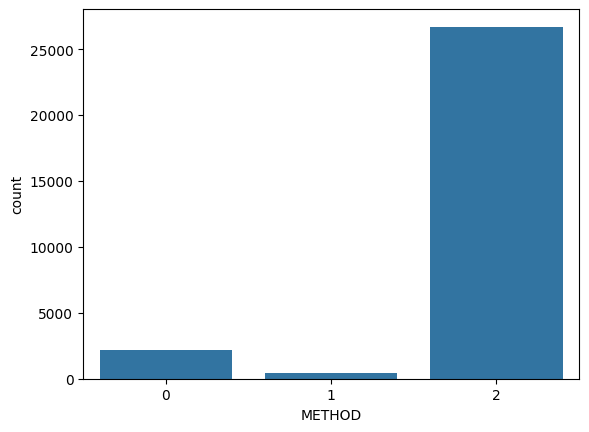

In [36]:
sns.countplot(x='METHOD',data=df)

## Outlier Detection and Removal

In [37]:
df.describe()

,CNN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,SHIFT,CLUSTER,OFFENSE,MONTH,METHOD
count,2.929500e+04,29295.000000,29295.000000,29295.000000,29295.000000,29295.000000,29295.000000,29295.000000,29295.000000,29295.000000,29295.000000
mean,2.412673e+07,399281.365190,137801.454601,4.393685,3.685407,375.260864,0.809899,18.068032,6.362349,6.753849,1.837413
std,1.624752e+05,3032.291061,3344.181868,2.322725,1.821774,182.306889,0.747959,11.526305,2.032714,3.434153,0.533464
min,5.094764e+06,390362.150000,127300.240000,1.000000,1.000000,101.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2.405873e+07,397229.000006,136234.280000,2.000000,2.000000,207.000000,0.000000,7.000000,4.000000,4.000000,2.000000
50%,2.411504e+07,399029.030000,137856.979997,5.000000,3.000000,401.000000,1.000000,19.000000,7.000000,7.000000,2.000000
75%,2.416641e+07,401206.777279,139815.115000,6.000000,5.000000,506.000000,1.000000,26.000000,8.000000,10.000000,2.000000
max,2.503097e+07,407806.750917,147365.030000,8.000000,7.000000,708.000000,2.000000,46.000000,8.000000,12.000000,2.000000


**A. Using percentile**

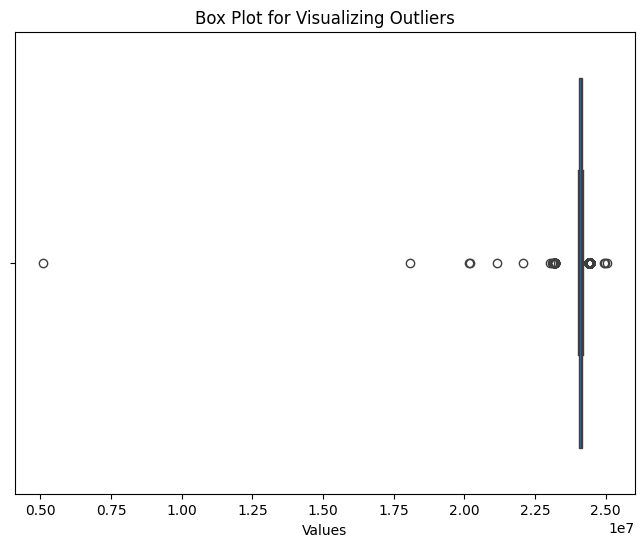

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['CNN'])
plt.title('Box Plot for Visualizing Outliers')
plt.xlabel('Values')
plt.show()

In [39]:
max_thresold = df['CNN'].quantile(0.95)
max_thresold

np.float64(24422085.6)

In [40]:
df[df['CNN']>max_thresold]

,CNN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,SHIFT,CLUSTER,OFFENSE,MONTH,METHOD
2154,24422699,401727.640000,139196.610000,5.0,5.0,505.0,2,22,7,7,2
2155,24422725,397628.830000,140648.850000,1.0,4.0,408.0,0,2,8,8,2
2156,24422785,395459.120000,137490.270000,2.0,2.0,207.0,1,5,8,8,2
2164,24423285,398728.300000,139835.900000,5.0,4.0,405.0,0,21,8,10,2
2165,24423655,397430.660000,136664.370000,2.0,2.0,209.0,0,8,8,10,2
...,...,...,...,...,...,...,...,...,...,...,...
29228,24423185,399886.385214,134826.361403,6.0,1.0,106.0,1,26,8,9,2
29229,24423515,397802.410000,139380.170000,1.0,3.0,304.0,2,2,8,10,2
29230,24423671,397430.660000,136664.370000,2.0,2.0,209.0,0,8,8,10,2
29231,24423714,396830.430000,137253.620000,2.0,2.0,207.0,1,6,8,10,2


In [41]:
min_thresold = df['CNN'].quantile(0.05)
min_thresold

np.float64(24010414.4)

In [42]:
df[df['CNN']<min_thresold]

,CNN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,SHIFT,CLUSTER,OFFENSE,MONTH,METHOD
3,18060158,400040.610046,129046.472149,8.0,7.0,706.0,2,39,3,7,0
41,24005463,397873.240000,138932.090000,1.0,3.0,305.0,1,3,8,1,2
42,24005538,402062.700000,137062.990000,5.0,5.0,507.0,1,23,8,1,2
43,24005580,399592.184382,134459.518842,6.0,1.0,106.0,1,27,7,1,2
44,24006348,397330.140000,138916.410000,1.0,3.0,305.0,2,3,7,1,2
...,...,...,...,...,...,...,...,...,...,...,...
29133,24000984,400600.000000,139626.190000,5.0,5.0,504.0,1,22,4,1,2
29134,24002017,400075.950000,140453.920000,5.0,4.0,405.0,1,20,7,1,2
29135,24002991,398905.180000,143187.080000,4.0,4.0,406.0,1,17,8,1,2
29275,24009025,399117.400000,128601.940000,8.0,7.0,708.0,1,39,8,1,2


In [43]:
df1= df[(df['CNN']<max_thresold) & (df['CNN']>min_thresold)]
df1

,CNN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,SHIFT,CLUSTER,OFFENSE,MONTH,METHOD
0,24054605,396384.27000,137427.760000,2.0,2.0,207.0,0,6,7,4,2
1,24056000,395709.91000,137490.940000,2.0,2.0,207.0,1,5,8,4,2
2,24056385,397497.55000,137053.130000,2.0,2.0,209.0,0,8,8,4,2
4,24013789,397171.11000,137408.250000,2.0,2.0,207.0,2,8,8,1,2
5,24013988,400594.86000,139371.550000,5.0,5.0,505.0,0,22,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...
29290,24042076,400089.04000,137531.630000,6.0,5.0,501.0,2,25,1,3,0
29291,24030573,397228.74000,137931.790000,2.0,3.0,307.0,1,7,7,2,2
29292,24033166,403784.43000,135262.060000,7.0,6.0,603.0,2,32,4,3,2
29293,24033419,396307.96000,137321.650000,2.0,2.0,207.0,0,6,8,3,2


In [44]:
max_thresold = df['XBLOCK'].quantile(0.95)
max_thresold

np.float64(405127.16)

In [45]:
df[df['XBLOCK']>max_thresold]

,CNN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,SHIFT,CLUSTER,OFFENSE,MONTH,METHOD
29,24025558,406438.798244,135644.459451,7.0,6.0,604.0,1,33,8,2,2
31,24026616,406775.576612,136516.849404,7.0,6.0,608.0,1,31,4,2,2
53,24010548,407132.454949,136517.790044,7.0,6.0,608.0,0,31,4,1,2
77,24018190,405392.120000,134417.960000,7.0,6.0,604.0,0,33,4,2,2
109,24031081,405967.070000,137071.710000,7.0,6.0,608.0,1,31,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...
29198,24177731,406738.386692,136915.276988,7.0,6.0,608.0,1,31,5,11,2
29209,24144176,406076.140000,135034.730000,7.0,6.0,604.0,0,33,7,9,2
29242,24167129,405735.970000,135420.930000,7.0,6.0,604.0,1,33,8,10,2
29248,24143595,405736.949987,137818.679997,7.0,6.0,602.0,0,31,5,9,2


In [46]:
min_thresold = df['XBLOCK'].quantile(0.05)
min_thresold

np.float64(394449.15)

In [47]:
df[df['XBLOCK']<min_thresold]

,CNN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,SHIFT,CLUSTER,OFFENSE,MONTH,METHOD
6,24014003,393016.93,142500.26,3.0,2.0,202.0,0,11,7,1,2
12,24016631,394446.81,137573.44,2.0,2.0,206.0,0,4,1,2,2
68,24033947,393070.63,142276.38,3.0,2.0,202.0,0,11,8,3,2
69,24034665,393881.06,142978.97,3.0,2.0,203.0,1,10,5,3,2
94,24024045,393645.65,140765.55,3.0,2.0,204.0,1,14,8,2,2
...,...,...,...,...,...,...,...,...,...,...,...
29196,24176190,393039.43,142375.16,3.0,2.0,202.0,1,11,8,11,2
29247,24142872,393418.59,140869.96,3.0,2.0,204.0,0,14,7,9,2
29255,24192917,394067.60,142978.84,3.0,2.0,203.0,1,12,7,12,2
29258,24196071,394095.03,143068.79,3.0,2.0,203.0,0,12,7,12,2


In [48]:
df1= df[(df['XBLOCK']<max_thresold) & (df['XBLOCK']>min_thresold)]
df1

,CNN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,SHIFT,CLUSTER,OFFENSE,MONTH,METHOD
0,24054605,396384.270000,137427.760000,2.0,2.0,207.0,0,6,7,4,2
1,24056000,395709.910000,137490.940000,2.0,2.0,207.0,1,5,8,4,2
2,24056385,397497.550000,137053.130000,2.0,2.0,209.0,0,8,8,4,2
3,18060158,400040.610046,129046.472149,8.0,7.0,706.0,2,39,3,7,0
4,24013789,397171.110000,137408.250000,2.0,2.0,207.0,2,8,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...
29290,24042076,400089.040000,137531.630000,6.0,5.0,501.0,2,25,1,3,0
29291,24030573,397228.740000,137931.790000,2.0,3.0,307.0,1,7,7,2,2
29292,24033166,403784.430000,135262.060000,7.0,6.0,603.0,2,32,4,3,2
29293,24033419,396307.960000,137321.650000,2.0,2.0,207.0,0,6,8,3,2


**B. Using Z Score**

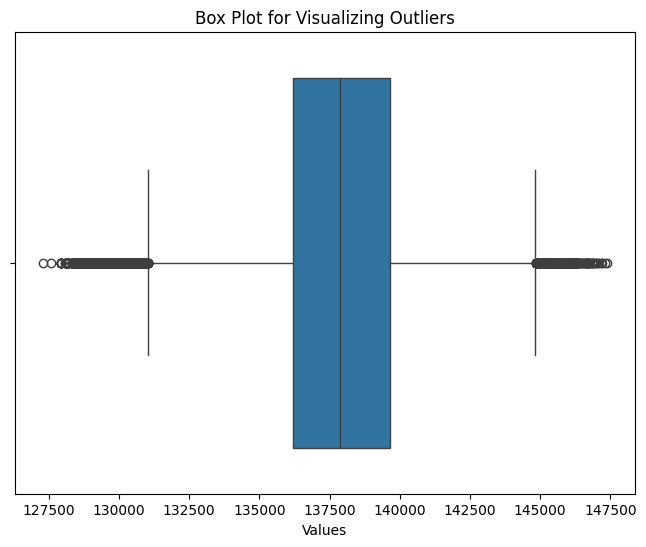

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1['YBLOCK'])
plt.title('Box Plot for Visualizing Outliers')
plt.xlabel('Values')
plt.show()

In [50]:
df1['zscore'] = ( df.YBLOCK - df.YBLOCK.mean() ) / df.YBLOCK.std()
df1.head(5)

C:\Users\Joem Mathews\AppData\Local\Temp\ipykernel_6740\861865781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['zscore'] = ( df.YBLOCK - df.YBLOCK.mean() ) / df.YBLOCK.std()


,CNN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,SHIFT,CLUSTER,OFFENSE,MONTH,METHOD,zscore
0,24054605,396384.270000,137427.760000,2.0,2.0,207.0,0,6,7,4,2,-0.111745
1,24056000,395709.910000,137490.940000,2.0,2.0,207.0,1,5,8,4,2,-0.092852
2,24056385,397497.550000,137053.130000,2.0,2.0,209.0,0,8,8,4,2,-0.223769
3,18060158,400040.610046,129046.472149,8.0,7.0,706.0,2,39,3,7,0,-2.617974
4,24013789,397171.110000,137408.250000,2.0,2.0,207.0,2,8,8,1,2,-0.117579


In [51]:
df1[df1['zscore']>3]

,CNN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,SHIFT,CLUSTER,OFFENSE,MONTH,METHOD,zscore


In [52]:
df1[df1['zscore']<-3]

,CNN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,SHIFT,CLUSTER,OFFENSE,MONTH,METHOD,zscore
8239,24115073,398794.04,127300.24,8.0,7.0,708.0,1,44,8,7,2,-3.140145
20708,24129926,398788.72,127571.28,8.0,7.0,708.0,1,44,8,8,2,-3.059096


In [53]:
df1= df1[(df1.zscore>-3) & (df1.zscore<3)]
df1

,CNN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,SHIFT,CLUSTER,OFFENSE,MONTH,METHOD,zscore
0,24054605,396384.270000,137427.760000,2.0,2.0,207.0,0,6,7,4,2,-0.111745
1,24056000,395709.910000,137490.940000,2.0,2.0,207.0,1,5,8,4,2,-0.092852
2,24056385,397497.550000,137053.130000,2.0,2.0,209.0,0,8,8,4,2,-0.223769
3,18060158,400040.610046,129046.472149,8.0,7.0,706.0,2,39,3,7,0,-2.617974
4,24013789,397171.110000,137408.250000,2.0,2.0,207.0,2,8,8,1,2,-0.117579
...,...,...,...,...,...,...,...,...,...,...,...,...
29290,24042076,400089.040000,137531.630000,6.0,5.0,501.0,2,25,1,3,0,-0.080685
29291,24030573,397228.740000,137931.790000,2.0,3.0,307.0,1,7,7,2,2,0.038974
29292,24033166,403784.430000,135262.060000,7.0,6.0,603.0,2,32,4,3,2,-0.759347
29293,24033419,396307.960000,137321.650000,2.0,2.0,207.0,0,6,8,3,2,-0.143474


**C. using IQR**

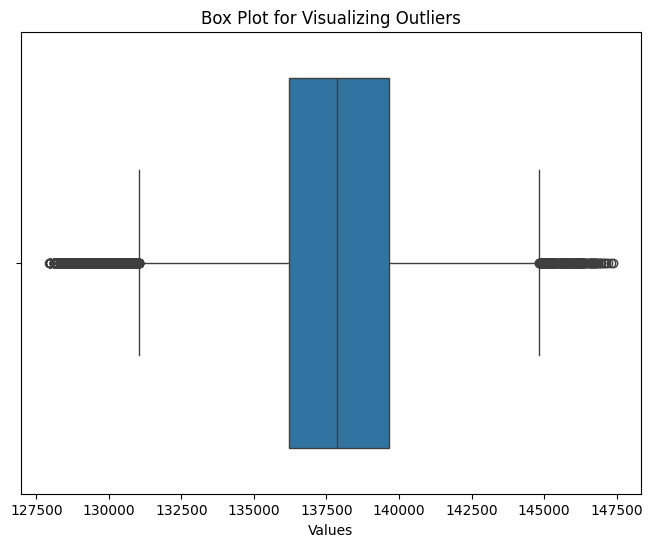

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1['YBLOCK'])
plt.title('Box Plot for Visualizing Outliers')
plt.xlabel('Values')
plt.show()

In [55]:
Q1 = df1.YBLOCK.quantile(0.25)
Q3 = df1.YBLOCK.quantile(0.75)
Q1, Q3

(np.float64(136202.183483826), np.float64(139653.6))

In [56]:
IQR = Q3 - Q1
IQR

np.float64(3451.4165161740093)

In [57]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(np.float64(131025.05870956498), np.float64(144830.724774261))

In [58]:
df1[(df1.YBLOCK<lower_limit)|(df1.YBLOCK>upper_limit)]

,CNN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,SHIFT,CLUSTER,OFFENSE,MONTH,METHOD,zscore
3,18060158,400040.610046,129046.472149,8.0,7.0,706.0,2,39,3,7,0,-2.617974
8,24014498,397370.400000,146617.140000,4.0,4.0,401.0,1,16,7,1,2,2.636126
33,24026931,399950.600542,129371.378869,8.0,7.0,706.0,0,39,7,2,2,-2.520819
35,24027552,400158.097918,129636.597846,8.0,7.0,706.0,0,39,5,2,0,-2.441511
51,24008398,397694.830000,146283.340000,4.0,4.0,401.0,1,16,8,1,2,2.536311
...,...,...,...,...,...,...,...,...,...,...,...,...
29224,24422271,402462.228864,130962.507607,8.0,7.0,704.0,2,38,8,6,2,-2.045028
29225,24422654,399695.582270,130571.314807,8.0,7.0,707.0,2,39,8,7,2,-2.162006
29275,24009025,399117.400000,128601.940000,8.0,7.0,708.0,1,39,8,1,2,-2.750901
29276,24172782,400998.020000,130720.490000,8.0,7.0,705.0,1,38,4,11,2,-2.117398


In [59]:
df2 = df1[(df1.YBLOCK>lower_limit)&(df1.YBLOCK<upper_limit)]
df2.head()

,CNN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,SHIFT,CLUSTER,OFFENSE,MONTH,METHOD,zscore
0,24054605,396384.27,137427.76,2.0,2.0,207.0,0,6,7,4,2,-0.111745
1,24056000,395709.91,137490.94,2.0,2.0,207.0,1,5,8,4,2,-0.092852
2,24056385,397497.55,137053.13,2.0,2.0,209.0,0,8,8,4,2,-0.223769
4,24013789,397171.11,137408.25,2.0,2.0,207.0,2,8,8,1,2,-0.117579
5,24013988,400594.86,139371.55,5.0,5.0,505.0,0,22,4,1,2,0.469501


In [60]:
df2.shape

(24514, 12)

In [61]:
df1.shape

(26299, 12)

In [62]:
data= df2.drop(columns=["zscore"])
data

,CNN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,SHIFT,CLUSTER,OFFENSE,MONTH,METHOD
0,24054605,396384.27000,137427.760000,2.0,2.0,207.0,0,6,7,4,2
1,24056000,395709.91000,137490.940000,2.0,2.0,207.0,1,5,8,4,2
2,24056385,397497.55000,137053.130000,2.0,2.0,209.0,0,8,8,4,2
4,24013789,397171.11000,137408.250000,2.0,2.0,207.0,2,8,8,1,2
5,24013988,400594.86000,139371.550000,5.0,5.0,505.0,0,22,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...
29290,24042076,400089.04000,137531.630000,6.0,5.0,501.0,2,25,1,3,0
29291,24030573,397228.74000,137931.790000,2.0,3.0,307.0,1,7,7,2,2
29292,24033166,403784.43000,135262.060000,7.0,6.0,603.0,2,32,4,3,2
29293,24033419,396307.96000,137321.650000,2.0,2.0,207.0,0,6,8,3,2


## Exploratory Data Analysis

In [63]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CNN,24514.0,2.412902e+07,116307.207326,20160181.00,24058184.25,2.411498e+07,24167225.50,2.496911e+07
XBLOCK,24514.0,3.992113e+05,2419.337481,394450.62,397301.73,3.988221e+05,400999.38,4.051271e+05
YBLOCK,24514.0,1.379900e+05,2748.694522,131031.17,136609.78,1.379764e+05,139647.08,1.448279e+05
WARD,24514.0,4.149874e+00,2.261270,1.00,2.00,5.000000e+00,6.00,8.000000e+00
DISTRICT,24514.0,3.477237e+00,1.690485,1.00,2.00,3.000000e+00,5.00,7.000000e+00
PSA,24514.0,3.543268e+02,169.009296,101.00,208.00,3.070000e+02,503.00,7.080000e+02
SHIFT,24514.0,8.112915e-01,0.749360,0.00,0.00,1.000000e+00,1.00,2.000000e+00
CLUSTER,24514.0,1.659444e+01,10.802443,1.00,6.00,1.800000e+01,25.00,4.600000e+01
OFFENSE,24514.0,6.426858e+00,1.994458,0.00,5.00,7.000000e+00,8.00,8.000000e+00
MONTH,24514.0,6.728319e+00,3.440294,1.00,4.00,7.000000e+00,10.00,1.200000e+01


In [64]:
data.corr()

,CNN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,SHIFT,CLUSTER,OFFENSE,MONTH,METHOD
CNN,1.000000,-0.068882,0.003565,-0.058438,-0.096331,-0.096913,-0.065075,-0.066191,0.169940,0.504223,0.087367
XBLOCK,-0.068882,1.000000,-0.455614,0.780387,0.577403,0.577827,-0.004137,0.817667,-0.210045,-0.026580,-0.105943
YBLOCK,0.003565,-0.455614,1.000000,-0.549204,-0.057952,-0.058915,-0.005774,-0.467501,0.075384,0.008702,0.065890
WARD,-0.058438,0.780387,-0.549204,1.000000,0.372540,0.371408,-0.028184,0.921854,-0.197418,-0.021405,-0.094537
DISTRICT,-0.096331,0.577403,-0.057952,0.372540,1.000000,0.992082,0.022275,0.511923,-0.197897,-0.029367,-0.122796
PSA,-0.096913,0.577827,-0.058915,0.371408,0.992082,1.000000,0.020871,0.512680,-0.194177,-0.028461,-0.120870
SHIFT,-0.065075,-0.004137,-0.005774,-0.028184,0.022275,0.020871,1.000000,-0.027330,-0.141836,-0.012498,-0.197458
CLUSTER,-0.066191,0.817667,-0.467501,0.921854,0.511923,0.512680,-0.027330,1.000000,-0.194732,-0.023708,-0.098309
OFFENSE,0.169940,-0.210045,0.075384,-0.197418,-0.197897,-0.194177,-0.141836,-0.194732,1.000000,0.010326,0.387631
MONTH,0.504223,-0.026580,0.008702,-0.021405,-0.029367,-0.028461,-0.012498,-0.023708,0.010326,1.000000,0.028104


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'CNN'),
  Text(0, 1.5, 'XBLOCK'),
  Text(0, 2.5, 'YBLOCK'),
  Text(0, 3.5, 'WARD'),
  Text(0, 4.5, 'DISTRICT'),
  Text(0, 5.5, 'PSA'),
  Text(0, 6.5, 'SHIFT'),
  Text(0, 7.5, 'CLUSTER'),
  Text(0, 8.5, 'OFFENSE'),
  Text(0, 9.5, 'MONTH'),
  Text(0, 10.5, 'METHOD')])

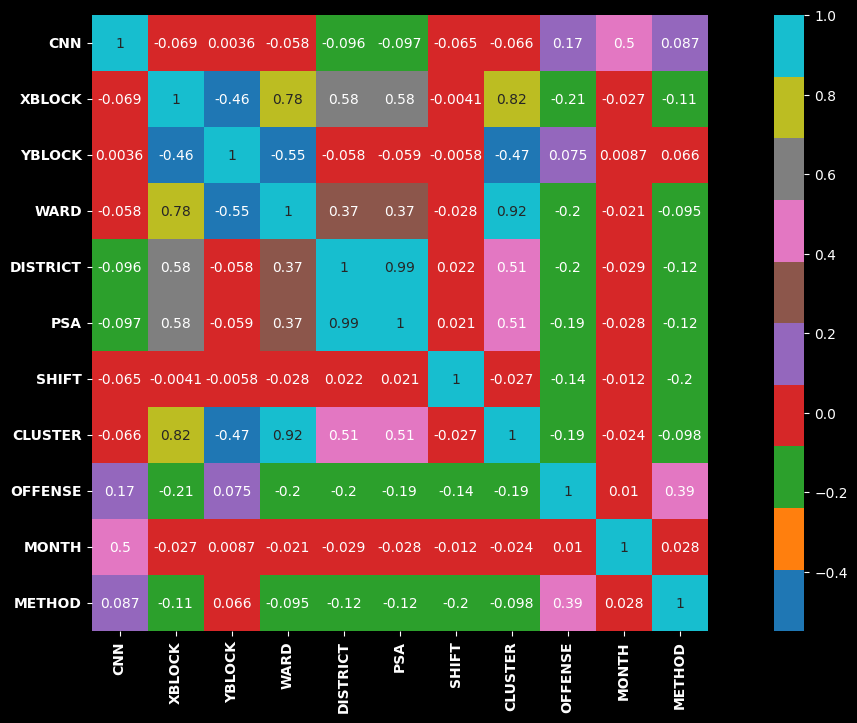

In [65]:
plt.style.use('dark_background')
plt.figure(figsize=(17,8))
sns.heatmap(data.corr(),annot=True,square=True,cmap='tab10')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')

**#Countplot using seaborn showing the counts of offenses by shift**

<Axes: xlabel='OFFENSE', ylabel='count'>

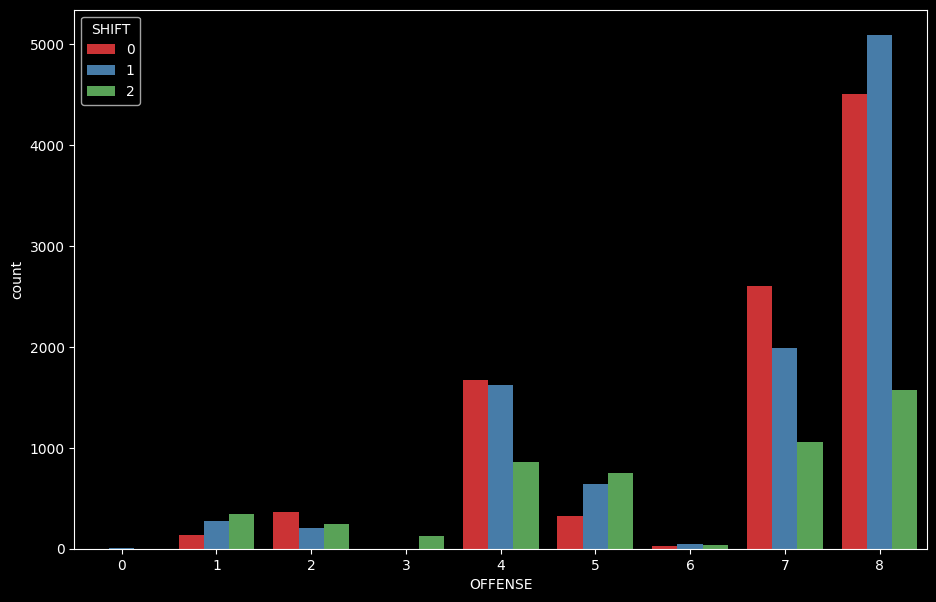

In [66]:
plt.figure(figsize=(11,7))
sns.countplot(x='OFFENSE',hue='SHIFT',data=data,palette='Set1')

**#Countplot using seaborn showing the counts of offenses by ward**

<Axes: xlabel='OFFENSE', ylabel='count'>

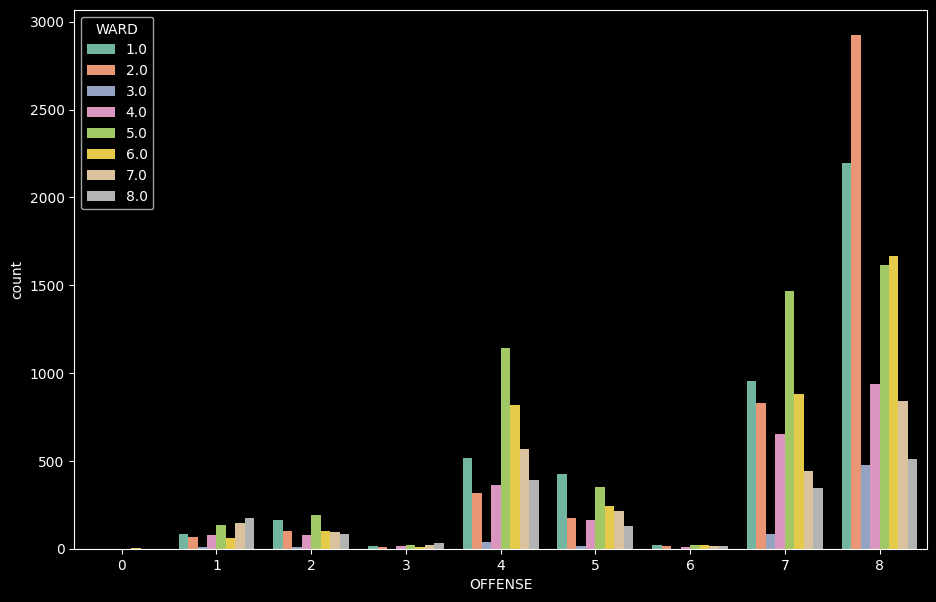

In [67]:
plt.figure(figsize=(11,7))
sns.countplot(x='OFFENSE',hue='WARD',data=data,palette='Set2')

**#Countplot using seaborn showing the counts of offenses by method**

<Axes: xlabel='OFFENSE', ylabel='count'>

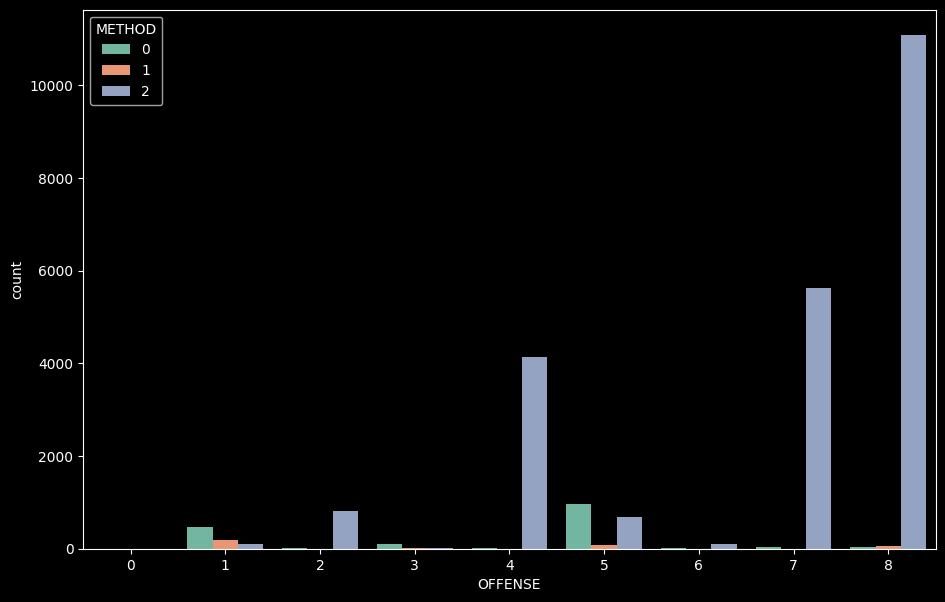

In [68]:
plt.figure(figsize=(11,7))
sns.countplot(x='OFFENSE',hue='METHOD',data=data,palette='Set2')

**Trend between offense and month**

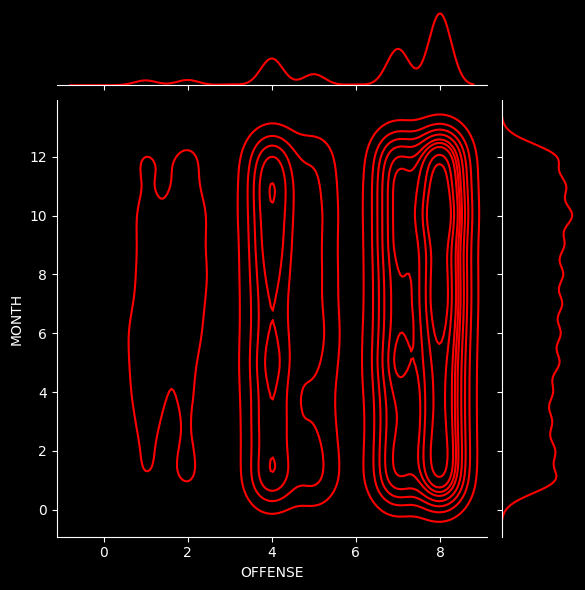

In [69]:
sns.jointplot(x='OFFENSE',y='MONTH',data=data,color='red',kind='kde')

**3D Surface plot**

In [70]:
offense_unique = np.unique(data['OFFENSE'])
month_unique = np.unique(data['MONTH'])
X, Y = np.meshgrid(offense_unique, month_unique)
Z = np.zeros_like(X, dtype=float)
for i in range(len(data)):
    x_idx = np.where(offense_unique == data['OFFENSE'].iloc[i])[0][0]
    y_idx = np.where(month_unique == df['MONTH'].iloc[i])[0][0]
    Z[y_idx, x_idx] = data['SHIFT'].iloc[i]

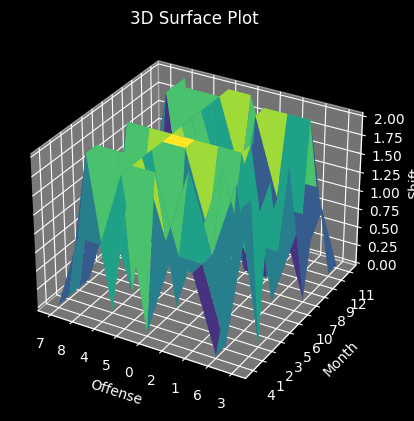

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Offense')
ax.set_ylabel('Month')
ax.set_zlabel('Shift')
ax.set_xticks(offense_unique)
ax.set_xticklabels(data['OFFENSE'].unique())
ax.set_yticks(month_unique)
ax.set_yticklabels(data['MONTH'].unique())
ax.set_title('3D Surface Plot')
plt.show()

In [72]:
data.METHOD.value_counts()

METHOD
2    22546
0     1634
1      334
Name: count, dtype: int64

**Pie chart for Method**

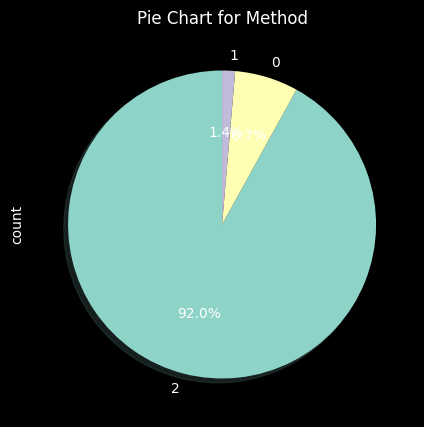

In [73]:
data["METHOD"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,shadow=True,figsize=(5,5))
plt.title("Pie Chart for Method")
plt.show()

**Pie chart for Offense**

In [74]:
print("Unique Offenses:", df["OFFENSE"].unique())

Unique Offenses: [7 8 3 4 5 1 0 2 6]


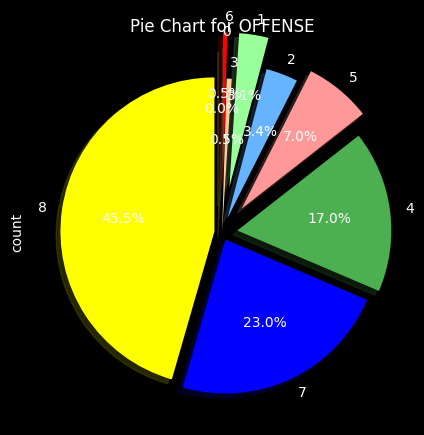

In [75]:
mycolors=["yellow","b","#4CAF50", '#ff9999', '#66b3ff', '#99ff99', '#ffcc99', 'r']
data["OFFENSE"].value_counts().plot.pie(explode=[0.05,0.05,0.1,0.2,0.1,0.3,0,0.3,0.2], colors=mycolors, autopct='%1.1f%%', startangle=90, shadow=True,figsize=(5,5))
plt.title("Pie Chart for OFFENSE")
plt.show()

**Offenses count plot**

<Axes: xlabel='OFFENSE', ylabel='count'>

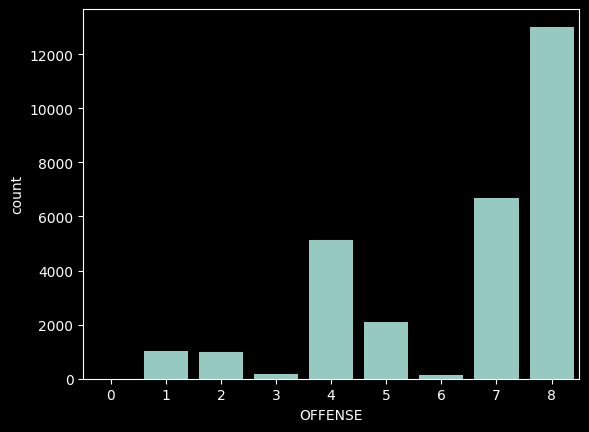

In [76]:
sns.countplot(x=df.OFFENSE)

**Trend between Offenses and Month**

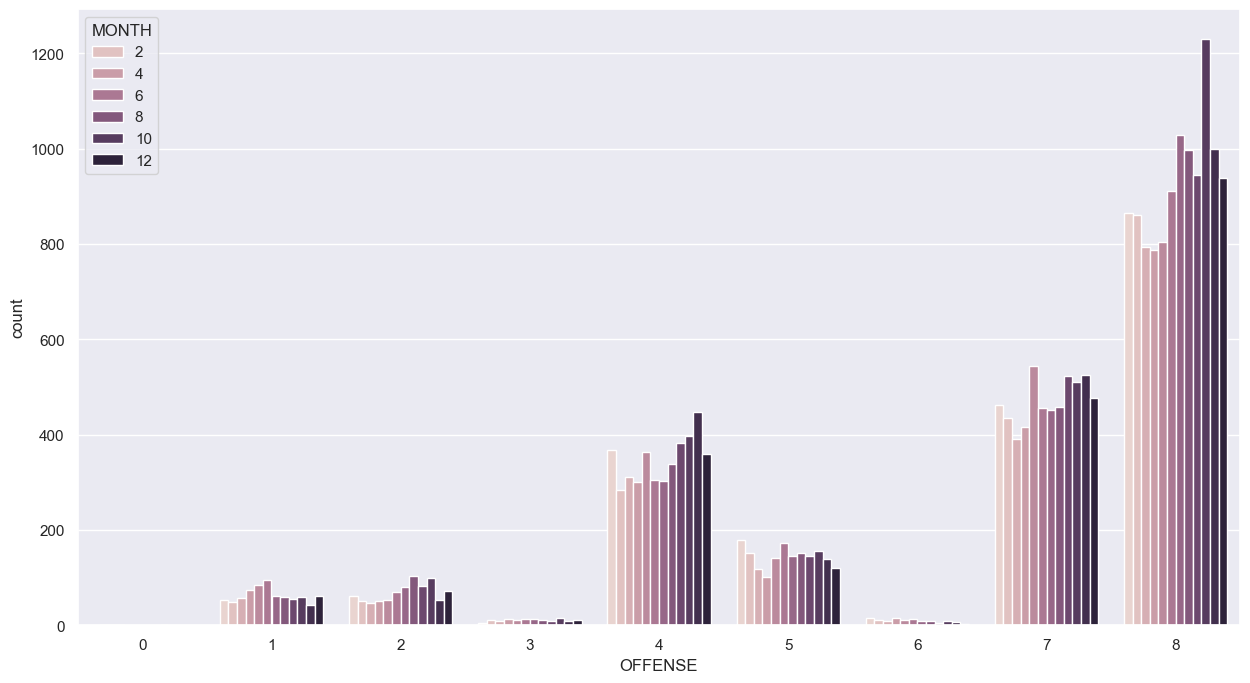

In [77]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='OFFENSE', hue="MONTH", data=data)
plt.show()

**Trend between Offence and CLUSTER**

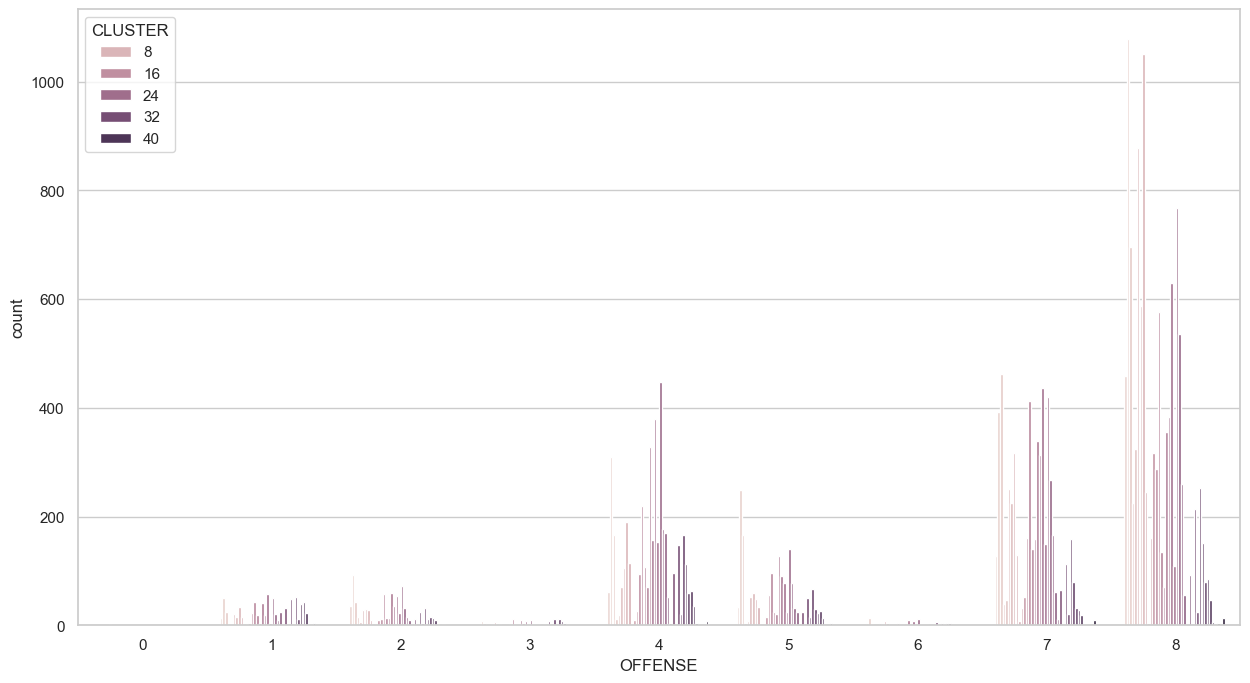

In [78]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='OFFENSE', hue="CLUSTER", data=data)
plt.show()

In [79]:
data.groupby(['OFFENSE'])['CLUSTER'].mean().sort_values(ascending=False).head(10)

OFFENSE
3    22.883721
1    22.310345
4    20.079510
6    18.657895
2    17.703163
7    17.068862
5    16.998834
8    14.432321
0    13.000000
Name: CLUSTER, dtype: float64

**Matrix plot**

In [80]:
corr_matrix=data[['OFFENSE','WARD','SHIFT']].corr()
print(corr_matrix)

          OFFENSE      WARD     SHIFT
OFFENSE  1.000000 -0.197418 -0.141836
WARD    -0.197418  1.000000 -0.028184
SHIFT   -0.141836 -0.028184  1.000000


<Axes: >

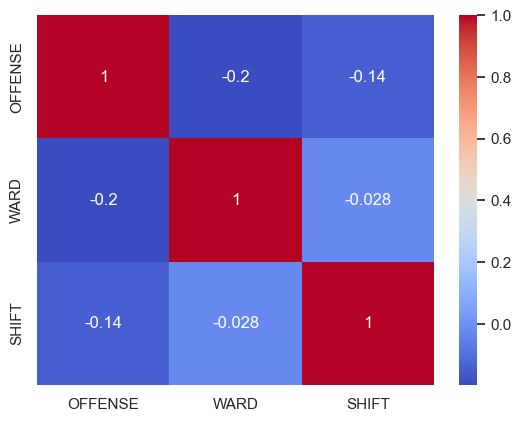

In [81]:
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)

## Spliting the Data

In [82]:
data.head()

,CNN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,SHIFT,CLUSTER,OFFENSE,MONTH,METHOD
0,24054605,396384.27,137427.76,2.0,2.0,207.0,0,6,7,4,2
1,24056000,395709.91,137490.94,2.0,2.0,207.0,1,5,8,4,2
2,24056385,397497.55,137053.13,2.0,2.0,209.0,0,8,8,4,2
4,24013789,397171.11,137408.25,2.0,2.0,207.0,2,8,8,1,2
5,24013988,400594.86,139371.55,5.0,5.0,505.0,0,22,4,1,2


In [83]:
y= data['METHOD']
y

0        2
1        2
2        2
4        2
5        2
        ..
29290    0
29291    2
29292    2
29293    2
29294    2
Name: METHOD, Length: 24514, dtype: int64

In [84]:
X= data.drop('METHOD', axis=1)
X

,CNN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,SHIFT,CLUSTER,OFFENSE,MONTH
0,24054605,396384.27000,137427.760000,2.0,2.0,207.0,0,6,7,4
1,24056000,395709.91000,137490.940000,2.0,2.0,207.0,1,5,8,4
2,24056385,397497.55000,137053.130000,2.0,2.0,209.0,0,8,8,4
4,24013789,397171.11000,137408.250000,2.0,2.0,207.0,2,8,8,1
5,24013988,400594.86000,139371.550000,5.0,5.0,505.0,0,22,4,1
...,...,...,...,...,...,...,...,...,...,...
29290,24042076,400089.04000,137531.630000,6.0,5.0,501.0,2,25,1,3
29291,24030573,397228.74000,137931.790000,2.0,3.0,307.0,1,7,7,2
29292,24033166,403784.43000,135262.060000,7.0,6.0,603.0,2,32,4,3
29293,24033419,396307.96000,137321.650000,2.0,2.0,207.0,0,6,8,3


**Train_Test_Split**

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [86]:
X.shape

(24514, 10)

In [87]:
X_train.ndim

2

In [88]:
X_train.shape

(17159, 10)

In [89]:
X_test.shape

(7355, 10)

**Standarization**

In [90]:
print(data.dtypes)

CNN           int64
XBLOCK      float64
YBLOCK      float64
WARD        float64
DISTRICT    float64
PSA         float64
SHIFT         int64
CLUSTER       int64
OFFENSE       int64
MONTH         int32
METHOD        int64
dtype: object


In [91]:
Scaler=StandardScaler()
Scaler.fit(X_train)
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.fit_transform(X_test)

**1. Logistic Regression**

**>Model Creation and Training**

In [92]:
lr_model=LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
lr_model.fit(X_train,y_train)

C:\Users\Joem Mathews\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

**>Prediction**

In [93]:
y_pred_lr=lr_model.predict(X_test)
y_pred_lr

array([2, 2, 2, ..., 0, 2, 2])

In [94]:
print(y_test)

29212    2
1166     2
9226     2
14122    2
6417     2
        ..
7934     2
4308     2
5128     0
15790    0
14588    2
Name: METHOD, Length: 7355, dtype: int64


**>Evaluation**

In [95]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

C:\Users\Joem Mathews\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Joem Mathews\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Joem Mathews\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [96]:
print(f"Accuracy: {accuracy_lr:.4f}")
print("Confusion Matrix:\n", conf_matrix_lr)
print("Classification Report:\n", class_report_lr)

Accuracy: 0.9255
Confusion Matrix:
 [[  91    0  411]
 [  34    0   61]
 [  42    0 6716]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.18      0.27       502
           1       0.00      0.00      0.00        95
           2       0.93      0.99      0.96      6758

    accuracy                           0.93      7355
   macro avg       0.49      0.39      0.41      7355
weighted avg       0.90      0.93      0.90      7355



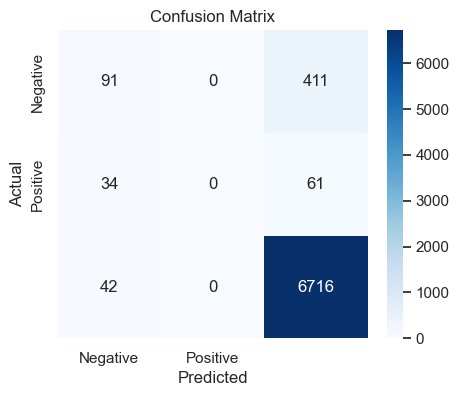

In [97]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Random Forest**

**>Model Creation and Training**

In [98]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

**>Prediction**

In [99]:
y_pred_rf=rf_model.predict(X_test)
y_pred_rf

array([2, 2, 2, ..., 0, 2, 2])

In [100]:
print(y_test)

29212    2
1166     2
9226     2
14122    2
6417     2
        ..
7934     2
4308     2
5128     0
15790    0
14588    2
Name: METHOD, Length: 7355, dtype: int64


**>Evaluation**

In [101]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

In [102]:
print(f"Accuracy: {accuracy_rf:.4f}")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

Accuracy: 0.9478
Confusion Matrix:
 [[ 323    9  170]
 [  54    9   32]
 [ 109   10 6639]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65       502
           1       0.32      0.09      0.15        95
           2       0.97      0.98      0.98      6758

    accuracy                           0.95      7355
   macro avg       0.65      0.57      0.59      7355
weighted avg       0.94      0.95      0.94      7355



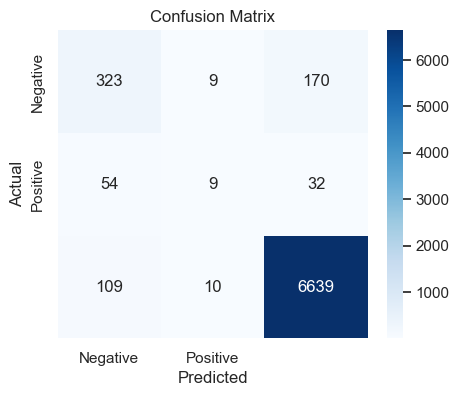

In [103]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**3. Decision Tree**

**>Model Creation and Training**

In [104]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

**>Prediction**

In [105]:
y_pred_dt=dt_model.predict(X_test)
y_pred_dt

array([2, 2, 2, ..., 0, 2, 2])

In [106]:
print(y_test)

29212    2
1166     2
9226     2
14122    2
6417     2
        ..
7934     2
4308     2
5128     0
15790    0
14588    2
Name: METHOD, Length: 7355, dtype: int64


**>Evaluation**

In [107]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

In [108]:
print(f"Accuracy: {accuracy_dt:.4f}")
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", class_report_dt)

Accuracy: 0.9351
Confusion Matrix:
 [[ 286   53  163]
 [  47   18   30]
 [ 139   45 6574]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.57      0.59       502
           1       0.16      0.19      0.17        95
           2       0.97      0.97      0.97      6758

    accuracy                           0.94      7355
   macro avg       0.58      0.58      0.58      7355
weighted avg       0.94      0.94      0.94      7355



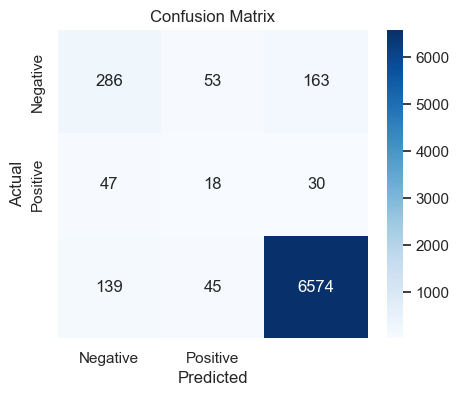

In [109]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**4. K-Nearest Neighbors**

**>Model creation and Tarining**

In [110]:
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

**>Prddiction**

In [111]:
y_pred_knn=knn_model.predict(X_test)
y_pred_knn

array([2, 2, 2, ..., 2, 2, 2])

In [112]:
print(y_test)

29212    2
1166     2
9226     2
14122    2
6417     2
        ..
7934     2
4308     2
5128     0
15790    0
14588    2
Name: METHOD, Length: 7355, dtype: int64


**>Evaluation**

In [113]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

In [114]:
print(f"Accuracy: {accuracy_knn:.4f}")
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", class_report_knn)

Accuracy: 0.9281
Confusion Matrix:
 [[ 193   13  296]
 [  29    4   62]
 [ 126    3 6629]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.38      0.45       502
           1       0.20      0.04      0.07        95
           2       0.95      0.98      0.96      6758

    accuracy                           0.93      7355
   macro avg       0.57      0.47      0.50      7355
weighted avg       0.91      0.93      0.92      7355



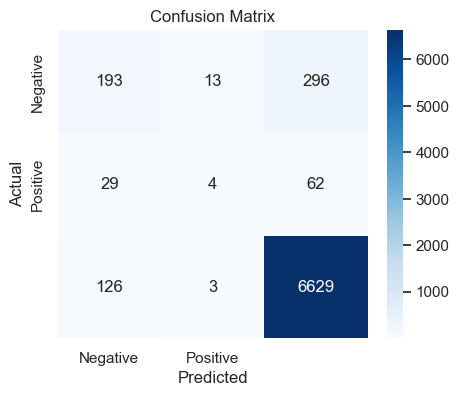

In [115]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Identifying the best Model

In [116]:
lr_results= pd.DataFrame(['Logistic Regression',accuracy_lr]).transpose()
lr_results.columns=['Model Name', 'Accuracy Score']
lr_results

,Model Name,Accuracy Score
0,Logistic Regression,0.925493


In [117]:
rf_results= pd.DataFrame(['Random Forest',accuracy_rf]).transpose()
rf_results.columns=['Model Name', 'Accuracy Score']
rf_results

,Model Name,Accuracy Score
0,Random Forest,0.947791


In [118]:
dt_results= pd.DataFrame(['Decision Tree',accuracy_dt]).transpose()
dt_results.columns=['Model Name', 'Accuracy Score']
dt_results

,Model Name,Accuracy Score
0,Decision Tree,0.935146


In [119]:
knn_results= pd.DataFrame(['K-Nearest Neighbors',accuracy_knn]).transpose()
knn_results.columns=['Model Name', 'Accuracy Score']
knn_results

,Model Name,Accuracy Score
0,K-Nearest Neighbors,0.928076


In [120]:
models_df= pd.concat([lr_results,rf_results,dt_results,knn_results], axis=0)
models_df.index= ['1','2','3','4']
models_df

,Model Name,Accuracy Score
1,Logistic Regression,0.925493
2,Random Forest,0.947791
3,Decision Tree,0.935146
4,K-Nearest Neighbors,0.928076


In [121]:
model_accuracies = {
    "Logistic Regression": accuracy_lr,
    "Random Forest": accuracy_rf,
    "Decision Tree": accuracy_dt,
    "K-Nearest Neighbors (KNN)": accuracy_knn
}

In [124]:
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"Best Model: {best_model} with Accuracy: {model_accuracies[best_model]}")

Best Model: Random Forest with Accuracy: 0.9477906186267845
